In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

# EDA и изучение данных

In [143]:
direct_df = pd.read_csv("data/direct.csv", encoding="utf-16", sep="	")
direct_df.head()

,Доп. объявление группы,Тип объявления,Места показа,Мобильное объявление,ID группы,Название группы,Номер группы,Тип кампании,ID кампании (локальный),ID кампании (серверный),...,Возрастные ограничения,Ссылка на приложение в магазине,Тип устройства,Тип связи,Версия ОС,Трекинговая ссылка,Иконка,Рейтинг,Количество оценок,Цена
0,-,Текстово-графическое,search,-,5129183431,Брендовые,1,Единая перфоманс-кампания,1,83048543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-,Текстово-графическое,search,-,5129183431,Брендовые,1,Единая перфоманс-кампания,1,83048543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-,Текстово-графическое,search,-,5129183431,Брендовые,1,Единая перфоманс-кампания,1,83048543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-,Текстово-графическое,search,-,5129183431,Брендовые,1,Единая перфоманс-кампания,1,83048543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-,Текстово-графическое,search,-,5129183431,Брендовые,1,Единая перфоманс-кампания,1,83048543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
direct_df.shape

(7668, 51)

In [145]:
direct_df.isna().sum()

Доп. объявление группы                0
Тип объявления                        0
Места показа                          0
Мобильное объявление                  0
ID группы                             0
Название группы                       0
Номер группы                          0
Тип кампании                          0
ID кампании (локальный)               0
ID кампании (серверный)               0
Название кампании                     0
Валюта                                0
ID фразы                            381
Фраза (с минус-словами)             381
ID объявления                         0
Заголовок 1                           0
Заголовок 2                           0
Текст                                 0
Ссылка                                0
Отображаемая ссылка                   0
Организация Яндекс.Справочника      724
Турбо-страница                     7668
Регион                              381
Автоставка                            0
Ставка                             3800


In [146]:
# Удаляем колонки, где все данные - nan.
empty_cols = [col for col in direct_df.columns if direct_df[col].isna().sum() >= 3000]
direct_df.drop(columns=empty_cols, inplace=True)
direct_df.isna().sum()

Доп. объявление группы              0
Тип объявления                      0
Места показа                        0
Мобильное объявление                0
ID группы                           0
Название группы                     0
Номер группы                        0
Тип кампании                        0
ID кампании (локальный)             0
ID кампании (серверный)             0
Название кампании                   0
Валюта                              0
ID фразы                          381
Фраза (с минус-словами)           381
ID объявления                       0
Заголовок 1                         0
Заголовок 2                         0
Текст                               0
Ссылка                              0
Отображаемая ссылка                 0
Организация Яндекс.Справочника    724
Регион                            381
Автоставка                          0
Заголовки быстрых ссылок            0
Описания быстрых ссылок             0
Адреса быстрых ссылок               0
Уточнения   

In [147]:
direct_df.shape

(7668, 27)

In [148]:
direct_df["Организация Яндекс.Справочника"].nunique()

1

Легче отказаться от колонки "Организация Яндекс.Справочника", нежели потерять 724 записи всего датасета (+-10%)

In [149]:
direct_df.drop(columns=["Организация Яндекс.Справочника"], inplace=True)

In [150]:
print(f"Количество уникальных фраз: {direct_df["Фраза (с минус-словами)"].nunique()}")
print(f"Количество id фраз: {direct_df["ID фразы"].nunique()}")

Количество уникальных фраз: 1982
Количество id фраз: 7286


т.к каждый айдишник уникальный - то эта колонка не несет полезной информации для анализа

In [151]:
direct_df.drop(columns=["ID фразы"], inplace=True)

In [152]:
direct_df["Доп. объявление группы"].value_counts()

Доп. объявление группы
-    7287
+     381
Name: count, dtype: int64

In [153]:
direct_df.drop(columns=["Доп. объявление группы"], inplace=True)

In [154]:
useless_cols=[col for col in direct_df.columns if direct_df[col].nunique()==1]
direct_df.drop(columns=useless_cols, inplace=True)
direct_df.dropna()
useless_cols

['Тип объявления', 'Мобильное объявление', 'Тип кампании', 'Валюта']

In [155]:
direct_df.shape

(7668, 20)

In [156]:
direct_df.head()

,Места показа,ID группы,Название группы,Номер группы,ID кампании (локальный),ID кампании (серверный),Название кампании,Фраза (с минус-словами),ID объявления,Заголовок 1,Заголовок 2,Текст,Ссылка,Отображаемая ссылка,Регион,Автоставка,Заголовки быстрых ссылок,Описания быстрых ссылок,Адреса быстрых ссылок,Уточнения
0,search,5129183431,Брендовые,1,1,83048543,TANK Кемерово - Поиск - Общие,---autotargeting,13464767000,Внедорожник премиум класса TANK. В кредит от 0...,От 3 899 000 ₽,Премиальный дизайн. Исключительный комфорт. За...,https://sibinpex-tank.ru/?utm_source=yandex&ut...,TANK-Кемерово,"Кемеровская область (Кузбасс), -Новокузнецк",+,TANK||Сервис от официального дилера||Спецпредл...,Официальный дилер в Кемерово||Новый рамный вне...,https://sibinpex-tank.ru/?calltouch_tm=yd_c:{c...,Премиальные внедорожники||Интеллектуальное вож...
1,search,5129183431,Брендовые,1,1,83048543,TANK Кемерово - Поиск - Общие,"""tank""",13464767000,Внедорожник премиум класса TANK. В кредит от 0...,От 3 899 000 ₽,Премиальный дизайн. Исключительный комфорт. За...,https://sibinpex-tank.ru/?utm_source=yandex&ut...,TANK-Кемерово,"Кемеровская область (Кузбасс), -Новокузнецк",-,TANK||Сервис от официального дилера||Спецпредл...,Официальный дилер в Кемерово||Новый рамный вне...,https://sibinpex-tank.ru/?calltouch_tm=yd_c:{c...,Премиальные внедорожники||Интеллектуальное вож...
2,search,5129183431,Брендовые,1,1,83048543,TANK Кемерово - Поиск - Общие,tank авто,13464767000,Внедорожник премиум класса TANK. В кредит от 0...,От 3 899 000 ₽,Премиальный дизайн. Исключительный комфорт. За...,https://sibinpex-tank.ru/?utm_source=yandex&ut...,TANK-Кемерово,"Кемеровская область (Кузбасс), -Новокузнецк",-,TANK||Сервис от официального дилера||Спецпредл...,Официальный дилер в Кемерово||Новый рамный вне...,https://sibinpex-tank.ru/?calltouch_tm=yd_c:{c...,Премиальные внедорожники||Интеллектуальное вож...
3,search,5129183431,Брендовые,1,1,83048543,TANK Кемерово - Поиск - Общие,авто танк цена,13464767000,Внедорожник премиум класса TANK. В кредит от 0...,От 3 899 000 ₽,Премиальный дизайн. Исключительный комфорт. За...,https://sibinpex-tank.ru/?utm_source=yandex&ut...,TANK-Кемерово,"Кемеровская область (Кузбасс), -Новокузнецк",-,TANK||Сервис от официального дилера||Спецпредл...,Официальный дилер в Кемерово||Новый рамный вне...,https://sibinpex-tank.ru/?calltouch_tm=yd_c:{c...,Премиальные внедорожники||Интеллектуальное вож...
4,search,5129183431,Брендовые,1,1,83048543,TANK Кемерово - Поиск - Общие,авто танк цена +в рублях,13464767000,Внедорожник премиум класса TANK. В кредит от 0...,От 3 899 000 ₽,Премиальный дизайн. Исключительный комфорт. За...,https://sibinpex-tank.ru/?utm_source=yandex&ut...,TANK-Кемерово,"Кемеровская область (Кузбасс), -Новокузнецк",-,TANK||Сервис от официального дилера||Спецпредл...,Официальный дилер в Кемерово||Новый рамный вне...,https://sibinpex-tank.ru/?calltouch_tm=yd_c:{c...,Премиальные внедорожники||Интеллектуальное вож...


Собственно, данных для оценки эффективности компании и не осталось... 

# Анализ РСЯ

In [157]:
yan_df = pd.read_csv("data/data_03.csv", header=3, sep=";")
yan_df.replace({',': '.'}, regex=True, inplace=True)
yan_df.head()

,Дата,Группа,№ Группы,№ Объявления,Формат,Размер изображения,Тип устройства,Пол,Категория таргетинга,Упоминание брендов,...,Цена цели (руб.)/Клик по номеру телефона,Конверсии/Клик по email,Конверсии/GTM - Отправка всех форм,Конверсии/Клик по номеру телефона,Рентабельность,Доля рекламных расходов/Клик по email,Доля рекламных расходов/GTM - Отправка всех форм,Доля рекламных расходов/Клик по номеру телефона,Доход (руб.),Прибыль (руб.)
0,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,графический,с изображением,десктоп,мужской,не определено,не определено,...,-,-,-,-,-,-,-,-,0.00,0.00
1,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,графический,с изображением,десктоп,мужской,не определено,не определено,...,-,-,-,-,-,-,-,-,0.00,0.00
2,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,графический,с изображением,десктоп,женский,не определено,не определено,...,-,-,-,-,-,-,-,-,0.00,0.00
3,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,графический,с изображением,десктоп,женский,не определено,не определено,...,-,-,-,-,-,-,-,-,0.00,0.00
4,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,графический,с изображением,десктоп,женский,не определено,не определено,...,-,-,-,-,-,-,-,-,0.00,0.00


In [158]:
useless_cols=[col for col in yan_df.columns if yan_df[col].nunique() == 1]
# Удаляем, все равно в них только значения "не определено"
yan_df.drop(columns=useless_cols, inplace=True)
useless_cols

['Категория таргетинга', 'Упоминание брендов']

In [159]:
yan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25442 entries, 0 to 25441
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Дата                                              25442 non-null  object
 1   Группа                                            25442 non-null  object
 2   № Группы                                          25442 non-null  int64 
 3   № Объявления                                      25442 non-null  object
 4   Формат                                            25442 non-null  object
 5   Размер изображения                                25442 non-null  object
 6   Тип устройства                                    25442 non-null  object
 7   Пол                                               25442 non-null  object
 8   Уровень платежеспособности                        25442 non-null  object
 9   Возраст                     

In [160]:
# Формат - тк. 99.99% значений - графический, останольное текстовый         
# Размер изображения - тк. 99.99% значений - 'с изображением', останольное "без изображения"
# 'Конверсия (%)/Клик по email', 'Конверсия (%)/GTM - Отправка всех форм', 'Конверсия (%)/Клик по номеру телефона', 'Цена цели (руб.)/Клик по email', 'Цена цели (руб.)/GTM - Отправка всех форм', 'Конверсии/Клик по email', "Конверсии/GTM - Отправка всех форм", "Конверсии/Клик по номеру телефона", "Рентабельность", "Доля рекламных расходов/Клик по email" - тк 99% отсутствует или ужасное распределение
culumns_to_drop = [
    "Формат", "Размер изображения", 'Конверсия (%)/Клик по email', 'Конверсия (%)/GTM - Отправка всех форм', 'Конверсия (%)/Клик по номеру телефона', 'Цена цели (руб.)/Клик по email',
    "Цена цели (руб.)/GTM - Отправка всех форм", "Конверсии/Клик по email", "Конверсии/GTM - Отправка всех форм", "Конверсии/Клик по номеру телефона", "Рентабельность",
    "Доля рекламных расходов/Клик по email", "Доля рекламных расходов/GTM - Отправка всех форм", "Доля рекламных расходов/Клик по номеру телефона"
]
yan_df.drop(columns=culumns_to_drop, inplace=True)
yan_df.shape

(25442, 20)

In [161]:
yan_df.head()

,Дата,Группа,№ Группы,№ Объявления,Тип устройства,Пол,Уровень платежеспособности,Возраст,Заголовок,Текст,Ссылка,Показы,Клики,CTR (%),Расход (руб.),Ср. цена клика (руб.),Глубина (стр.),Цена цели (руб.)/Клик по номеру телефона,Доход (руб.),Прибыль (руб.)
0,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,десктоп,мужской,Остальные,старше 55,Автомобили TANK с супервыгодой. Уже в Сибинпэкс!,От 4 099 000₽ — Исключительный комфорт. Заполн...,https://tank-kemerovo.ru/?utm_source=yandex&ut...,2,0,0.00,0.00,-,-,-,0.00,0.00
1,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,десктоп,мужской,6-10%,18-24,Автомобили TANK с супервыгодой. Уже в Сибинпэкс!,От 4 099 000₽ — Исключительный комфорт. Заполн...,https://tank-kemerovo.ru/?utm_source=yandex&ut...,1,0,0.00,0.00,-,-,-,0.00,0.00
2,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,десктоп,женский,Остальные,не определен,Автомобили TANK с супервыгодой. Уже в Сибинпэкс!,От 4 099 000₽ — Исключительный комфорт. Заполн...,https://tank-kemerovo.ru/?utm_source=yandex&ut...,1,0,0.00,0.00,-,-,-,0.00,0.00
3,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,десктоп,женский,Остальные,18-24,Автомобили TANK с супервыгодой. Уже в Сибинпэкс!,От 4 099 000₽ — Исключительный комфорт. Заполн...,https://tank-kemerovo.ru/?utm_source=yandex&ut...,2,0,0.00,0.00,-,-,-,0.00,0.00
4,09.10.2023,Брендовые - Общие,5297165573,M-15104907055,десктоп,женский,Остальные,35-44,Автомобили TANK с супервыгодой. Уже в Сибинпэкс!,От 4 099 000₽ — Исключительный комфорт. Заполн...,https://tank-kemerovo.ru/?utm_source=yandex&ut...,2,0,0.00,0.00,-,-,-,0.00,0.00


Text(0.5, 0, 'Возраст')

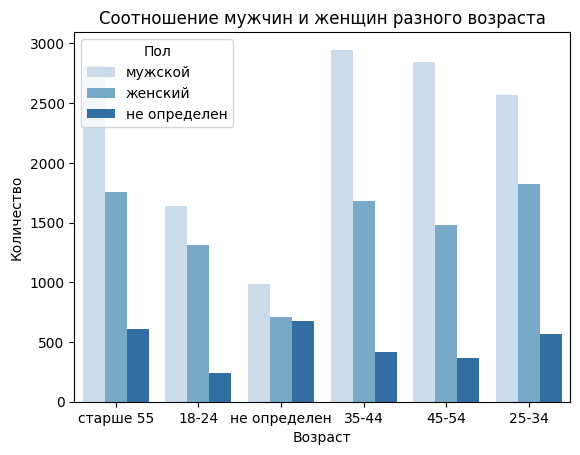

In [164]:
sns.countplot(data=yan_df, x='Возраст', hue='Пол', palette='Blues')
plt.title('Соотношение мужчин и женщин разного возраста')
plt.ylabel('Количество')
plt.xlabel('Возраст')

Text(0.5, 0, 'Возраст')

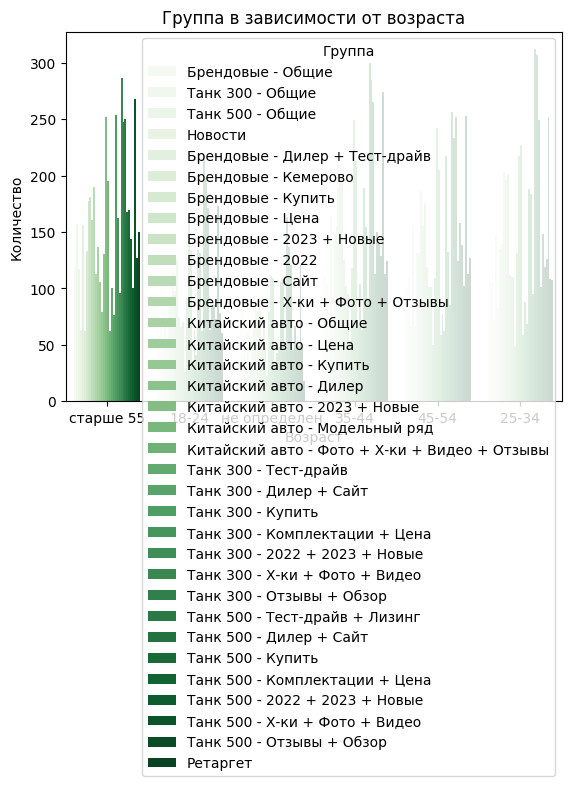

In [165]:
sns.countplot(data=yan_df, x='Возраст', hue='Группа', palette='Greens')
plt.title('Группа в зависимости от возраста')
plt.ylabel('Количество')
plt.xlabel('Возраст')

In [ ]:
sns.heatmap(pd.get_dummies(yan_df.drop(columns=["Дата"])).corr())